# **Telecom Churn Case Study**

## Problem Statement

### Business problem overview
- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
 
- For many incumbent operators, retaining high profitable customers is the number one business goal.
 
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
 
- In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Definitions of churn

### There are various ways to define churn, such as:
 
- Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.
  
    - The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.
 
- Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
    - A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

## Understanding the business objective and the data

- The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

- The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Understanding customer behaviour during churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :
- The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.
- The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)
- The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

## Import All The Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Read The CSV file

In [2]:
df=pd.read_csv("telecom_churn_data.csv")

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# Shape of the Dataframe
df.shape

(99999, 226)

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
#Statistical distribution of numerical columns of the dataframe
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [7]:
# Gets the n uninque Values of the series
df.nunique()

mobile_number     99999
circle_id             1
loc_og_t2o_mou        1
std_og_t2o_mou        1
loc_ic_t2o_mou        1
                  ...  
aon                3489
aug_vbc_3g        14676
jul_vbc_3g        14162
jun_vbc_3g        13312
sep_vbc_3g         3720
Length: 226, dtype: int64

### List of Columns having only one Unique Value.

In [8]:
list_1=[]
for i in df.columns:
    if df[i].nunique() == 1:
        list_1.append(i)
        
list_1        

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [9]:
df[list_1]

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
99997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### First Step: Filter High Value Customers.

- high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [10]:
# now all the recharge columns
rech_cols=[]
for i in df.columns:
    if "rech" in i:
        rech_cols.append(i)

rech_cols        

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

- now since we need to have a high value customers in good phase i.e first two months we will filter out from those columns

In [11]:
df['total_data_rech_amt_6'] = df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_data_rech_amt_7'] = df['av_rech_amt_data_7'] * df['total_rech_data_7']
df['total_data_rech_amt_8'] = df['av_rech_amt_data_8'] * df['total_rech_data_8']
df['total_data_rech_amt_9'] = df['av_rech_amt_data_9'] * df['total_rech_data_9']

In [12]:
## Average amount in good phase

In [13]:
average_rech_amt = (df['total_rech_amt_6'].fillna(0) + df['total_rech_amt_7'].fillna(0) + df['total_data_rech_amt_6'].fillna(0) + df['total_data_rech_amt_7'].fillna(0))//2

In [14]:
# Drop the columns which derived new columns
df.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)

In [15]:
df.shape

(99999, 222)

In [16]:
# now the high value customers:
df=df[ average_rech_amt >= average_rech_amt.quantile(0.70) ]

In [17]:
df.shape

(30001, 222)

In [18]:
# hence high value customers are now filtered out.

### Second Step: Tagging Churn

- Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
    - total_ic_mou_9
    - total_og_mou_9
    - vol_2g_mb_9
    - vol_3g_mb_9

In [19]:
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
df[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [20]:
df['churn']=0

df['churn'] = np.where(df[churn_col].sum(axis=1) == 0, 1, 0)

In [21]:
df[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9","churn"]].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.00,0.00,0.00,0.00,1
7,0.00,0.00,0.00,0.00,1
8,34.91,142.18,0.00,0.00,0
21,252.61,1031.53,0.00,0.00,0
23,127.48,127.63,13.93,314.74,0


In [22]:
# % of Churned Customers:
df.churn.sum()/len(df) * 100

8.136395453484884

In [23]:
df.churn.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [24]:
## deleting the attributes _9 
cols_9=[]
for cols in df.columns:
    if "_9" in cols:
        cols_9.append(cols)

In [25]:
cols_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'total_data_rec

In [26]:
df.drop(cols_9,axis=1,inplace=True)

In [27]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,NaN,802,57.74,19.38,18.74,0.00,NaN,NaN,NaN,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,1.0,315,21.03,910.65,122.16,0.00,NaN,354.0,207.0,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,...,NaN,720,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,...,1.0,604,40.45,51.86,0.00,0.00,NaN,712.0,540.0,0


In [28]:
df.shape

(30001, 170)

## PreProcessing The Data before Modelling i.e, Data Cleaning and EDA

In [29]:
## Checking the missing Values of the data

In [30]:
df.isnull().sum()

mobile_number                0
circle_id                    0
loc_og_t2o_mou             224
std_og_t2o_mou             224
loc_ic_t2o_mou             224
                         ...  
sep_vbc_3g                   0
total_data_rech_amt_6    13245
total_data_rech_amt_7    12944
total_data_rech_amt_8    14048
churn                        0
Length: 170, dtype: int64

In [31]:
#% missing Values the df

In [32]:
missing_cols=((df.isnull().sum()/len(df))*100).round(2).sort_values(ascending=False)

In [33]:
missing_cols_30=missing_cols[missing_cols>30]

In [34]:
missing_cols_30

date_of_last_rech_data_8    46.83
count_rech_3g_8             46.83
count_rech_2g_8             46.83
arpu_3g_8                   46.83
total_data_rech_amt_8       46.83
arpu_2g_8                   46.83
fb_user_8                   46.83
max_rech_data_8             46.83
night_pck_user_8            46.83
date_of_last_rech_data_6    44.15
count_rech_3g_6             44.15
fb_user_6                   44.15
total_data_rech_amt_6       44.15
max_rech_data_6             44.15
night_pck_user_6            44.15
arpu_2g_6                   44.15
arpu_3g_6                   44.15
count_rech_2g_6             44.15
arpu_3g_7                   43.15
fb_user_7                   43.15
date_of_last_rech_data_7    43.15
max_rech_data_7             43.15
count_rech_2g_7             43.15
count_rech_3g_7             43.15
night_pck_user_7            43.15
total_data_rech_amt_7       43.15
arpu_2g_7                   43.15
dtype: float64

In [35]:
#drop the missing_cols_30 from df

In [36]:
df.drop(missing_cols_30.index,axis=1,inplace=True)

In [37]:
df.shape

(30001, 143)

In [38]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,1,0,0,0,968,30.40,0.00,101.20,3.58,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,0,0,0,0,802,57.74,19.38,18.74,0.00,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,0,0,0,0,315,21.03,910.65,122.16,0.00,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,...,0,0,0,0,720,0.00,0.00,0.00,0.00,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,...,1,0,0,1,604,40.45,51.86,0.00,0.00,0


In [39]:
## Checking missing Values in df

In [40]:
((df.isnull().sum()*100)/len(df)).sort_values(ascending=False)

loc_ic_mou_8          3.913203
og_others_8           3.913203
loc_og_t2f_mou_8      3.913203
loc_ic_t2t_mou_8      3.913203
spl_og_mou_8          3.913203
                        ...   
max_rech_amt_6        0.000000
max_rech_amt_7        0.000000
max_rech_amt_8        0.000000
last_day_rch_amt_6    0.000000
churn                 0.000000
Length: 143, dtype: float64

In [41]:
## drop the columns having Only One Unique Value

In [42]:
list_2=[]
for i in df.columns:
    if df[i].nunique() == 1:
        list_2.append(i)
list_2        

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [43]:
df.drop(list_2,inplace=True,axis=1)

In [44]:
df.shape

(30001, 130)

In [45]:
# now we have to remove missing values from the rows of df

In [46]:
for cols in df.columns:
    df = df[~df[cols].isna()]
    
# Re-check missing values
round(df.isna().sum() / len(df) * 100, 2).sort_values(ascending=False)

mobile_number       0.0
max_rech_amt_6      0.0
total_rech_amt_7    0.0
total_rech_amt_6    0.0
total_rech_num_8    0.0
                   ... 
std_og_t2f_mou_7    0.0
std_og_t2f_mou_6    0.0
std_og_t2m_mou_8    0.0
std_og_t2m_mou_7    0.0
churn               0.0
Length: 130, dtype: float64

In [47]:
# now we have Handled All the missing Values of the data.

In [48]:
## now Let's see the correlation between the columns of df and drop the columns having a very high correlation
## between them

In [49]:
corr_data = df.corr()
corr_data.loc[:, :] = np.tril(corr_data, -1)
corr_data = corr_data.stack()
high_corr_value_cols = corr_data[(corr_data > 0.80) | (corr_data < -0.80)]
high_corr_value_cols

onnet_mou_8       onnet_mou_7         0.811314
loc_og_t2t_mou_7  loc_og_t2t_mou_6    0.801091
loc_og_t2t_mou_8  loc_og_t2t_mou_7    0.836495
loc_og_t2m_mou_8  loc_og_t2m_mou_7    0.826281
loc_og_t2f_mou_7  loc_og_t2f_mou_6    0.812776
loc_og_mou_7      loc_og_mou_6        0.813507
loc_og_mou_8      loc_og_mou_7        0.844488
std_og_t2t_mou_6  onnet_mou_6         0.854877
std_og_t2t_mou_7  onnet_mou_7         0.855710
std_og_t2t_mou_8  onnet_mou_8         0.857414
                  std_og_t2t_mou_7    0.807650
std_og_t2m_mou_6  offnet_mou_6        0.827366
std_og_t2m_mou_7  offnet_mou_7        0.853892
std_og_t2m_mou_8  offnet_mou_8        0.849614
isd_og_mou_7      isd_og_mou_6        0.940197
isd_og_mou_8      isd_og_mou_6        0.951179
                  isd_og_mou_7        0.951454
total_og_mou_6    std_og_mou_6        0.828959
total_og_mou_7    std_og_mou_7        0.846326
total_og_mou_8    std_og_mou_8        0.847875
loc_ic_t2t_mou_7  loc_ic_t2t_mou_6    0.810423
loc_ic_t2t_mo

In [50]:
a=high_corr_value_cols.index

In [51]:
b=a.to_list()

In [52]:
b

[('onnet_mou_8', 'onnet_mou_7'),
 ('loc_og_t2t_mou_7', 'loc_og_t2t_mou_6'),
 ('loc_og_t2t_mou_8', 'loc_og_t2t_mou_7'),
 ('loc_og_t2m_mou_8', 'loc_og_t2m_mou_7'),
 ('loc_og_t2f_mou_7', 'loc_og_t2f_mou_6'),
 ('loc_og_mou_7', 'loc_og_mou_6'),
 ('loc_og_mou_8', 'loc_og_mou_7'),
 ('std_og_t2t_mou_6', 'onnet_mou_6'),
 ('std_og_t2t_mou_7', 'onnet_mou_7'),
 ('std_og_t2t_mou_8', 'onnet_mou_8'),
 ('std_og_t2t_mou_8', 'std_og_t2t_mou_7'),
 ('std_og_t2m_mou_6', 'offnet_mou_6'),
 ('std_og_t2m_mou_7', 'offnet_mou_7'),
 ('std_og_t2m_mou_8', 'offnet_mou_8'),
 ('isd_og_mou_7', 'isd_og_mou_6'),
 ('isd_og_mou_8', 'isd_og_mou_6'),
 ('isd_og_mou_8', 'isd_og_mou_7'),
 ('total_og_mou_6', 'std_og_mou_6'),
 ('total_og_mou_7', 'std_og_mou_7'),
 ('total_og_mou_8', 'std_og_mou_8'),
 ('loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_6'),
 ('loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_7'),
 ('loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_7'),
 ('loc_ic_mou_6', 'loc_ic_t2m_mou_6'),
 ('loc_ic_mou_7', 'loc_ic_t2m_mou_7'),
 ('loc_ic_mou_7', 'loc_ic_mo

In [53]:
a=set()
for i in b:
    a.add(i[0])

In [54]:
a

{'isd_og_mou_7',
 'isd_og_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'onnet_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8'}

In [55]:
list_corr=list(a)

In [56]:
list_corr

['std_og_t2t_mou_6',
 'loc_og_mou_7',
 'loc_ic_mou_6',
 'isd_og_mou_7',
 'loc_ic_t2t_mou_8',
 'total_og_mou_6',
 'total_rech_amt_6',
 'isd_og_mou_8',
 'loc_og_t2f_mou_7',
 'std_og_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_og_t2t_mou_8',
 'total_og_mou_7',
 'total_ic_mou_7',
 'std_og_t2t_mou_7',
 'total_rech_amt_8',
 'total_og_mou_8',
 'total_ic_mou_8',
 'std_ic_mou_7',
 'onnet_mou_8',
 'std_og_t2m_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_8',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'loc_og_mou_8',
 'total_rech_amt_7',
 'loc_ic_mou_8',
 'loc_ic_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_ic_mou_8',
 'loc_ic_t2t_mou_7']

In [57]:
df.drop(list_corr,axis=1,inplace=True)

In [58]:
df.shape

(28163, 97)

In [59]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,453.43,567.16,325.91,16.23,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,94.66,80.63,136.48,0.00,...,0,0,0,0,315,21.03,910.65,122.16,0.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,757.93,896.68,983.39,0.00,...,0,0,0,0,720,0.00,0.00,0.00,0.0,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,85.41,89.36,205.89,0.00,...,1,0,0,1,604,40.45,51.86,0.00,0.0,0
33,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,1,1,3,0,1328,358.10,2706.83,1714.67,0.0,0


In [60]:
# dropped all the highly correlated variables

In [61]:
# Lets convert aon in tenure of months

In [62]:
df["tenure"]=df["aon"]//30

In [63]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,tenure
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,453.43,567.16,325.91,16.23,...,0,0,0,802,57.74,19.38,18.74,0.0,1,26
8,7001524846,378.721,492.223,137.362,413.69,351.03,94.66,80.63,136.48,0.00,...,0,0,0,315,21.03,910.65,122.16,0.0,0,10
21,7002124215,514.453,597.753,637.760,102.41,132.11,757.93,896.68,983.39,0.00,...,0,0,0,720,0.00,0.00,0.00,0.0,0,24
23,7000887461,74.350,193.897,366.966,48.96,50.66,85.41,89.36,205.89,0.00,...,0,0,1,604,40.45,51.86,0.00,0.0,0,20
33,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,1,3,0,1328,358.10,2706.83,1714.67,0.0,0,44


In [64]:
df.drop("aon",axis=1,inplace=True)

In [65]:
df.shape

(28163, 97)

In [66]:
# Plot of Tenure

<AxesSubplot:xlabel='tenure', ylabel='Density'>

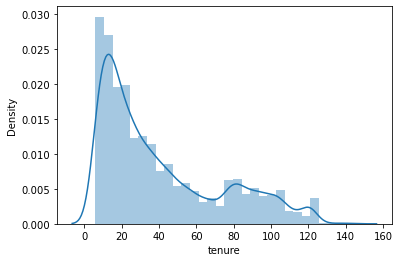

In [67]:
sns.distplot(df["tenure"],bins=30)

In [68]:
tn_range = [0, 6, 12, 24, 60,144]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df['tenure_range'] = pd.cut(df['tenure'], tn_range, labels=tn_label)
df['tenure_range'].head()

7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
33        2-5 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

In [69]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,tenure,tenure_range
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,453.43,567.16,325.91,16.23,...,0,0,0,57.74,19.38,18.74,0.0,1,26,2-5 Yrs
8,7001524846,378.721,492.223,137.362,413.69,351.03,94.66,80.63,136.48,0.00,...,0,0,0,21.03,910.65,122.16,0.0,0,10,6-12 Months
21,7002124215,514.453,597.753,637.760,102.41,132.11,757.93,896.68,983.39,0.00,...,0,0,0,0.00,0.00,0.00,0.0,0,24,1-2 Yrs
23,7000887461,74.350,193.897,366.966,48.96,50.66,85.41,89.36,205.89,0.00,...,0,0,1,40.45,51.86,0.00,0.0,0,20,1-2 Yrs
33,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,1,3,0,358.10,2706.83,1714.67,0.0,0,44,2-5 Yrs


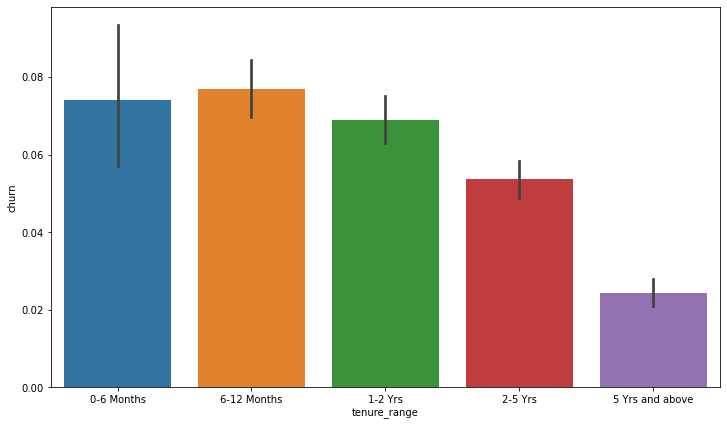

In [70]:
## Plot of tenure_range vs churn
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=df)
plt.show()

In [71]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28163 entries, 7 to 99997
Data columns (total 98 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   mobile_number        28163 non-null  int64   
 1   arpu_6               28163 non-null  float64 
 2   arpu_7               28163 non-null  float64 
 3   arpu_8               28163 non-null  float64 
 4   onnet_mou_6          28163 non-null  float64 
 5   onnet_mou_7          28163 non-null  float64 
 6   offnet_mou_6         28163 non-null  float64 
 7   offnet_mou_7         28163 non-null  float64 
 8   offnet_mou_8         28163 non-null  float64 
 9   roam_ic_mou_6        28163 non-null  float64 
 10  roam_ic_mou_7        28163 non-null  float64 
 11  roam_ic_mou_8        28163 non-null  float64 
 12  roam_og_mou_6        28163 non-null  float64 
 13  roam_og_mou_7        28163 non-null  float64 
 14  roam_og_mou_8        28163 non-null  float64 
 15  loc_og_t2t_mou_6   

In [72]:
#dropping Some more columns Which does not impact the future analysis

In [73]:
cols=["mobile_number","date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8"]

In [74]:
df.drop(cols,axis=1,inplace=True)

In [75]:
df.shape

(28163, 94)

In [76]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28163 entries, 7 to 99997
Data columns (total 94 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   arpu_6              28163 non-null  float64 
 1   arpu_7              28163 non-null  float64 
 2   arpu_8              28163 non-null  float64 
 3   onnet_mou_6         28163 non-null  float64 
 4   onnet_mou_7         28163 non-null  float64 
 5   offnet_mou_6        28163 non-null  float64 
 6   offnet_mou_7        28163 non-null  float64 
 7   offnet_mou_8        28163 non-null  float64 
 8   roam_ic_mou_6       28163 non-null  float64 
 9   roam_ic_mou_7       28163 non-null  float64 
 10  roam_ic_mou_8       28163 non-null  float64 
 11  roam_og_mou_6       28163 non-null  float64 
 12  roam_og_mou_7       28163 non-null  float64 
 13  roam_og_mou_8       28163 non-null  float64 
 14  loc_og_t2t_mou_6    28163 non-null  float64 
 15  loc_og_t2m_mou_6    28163 non-null  

In [77]:
# Box Plot

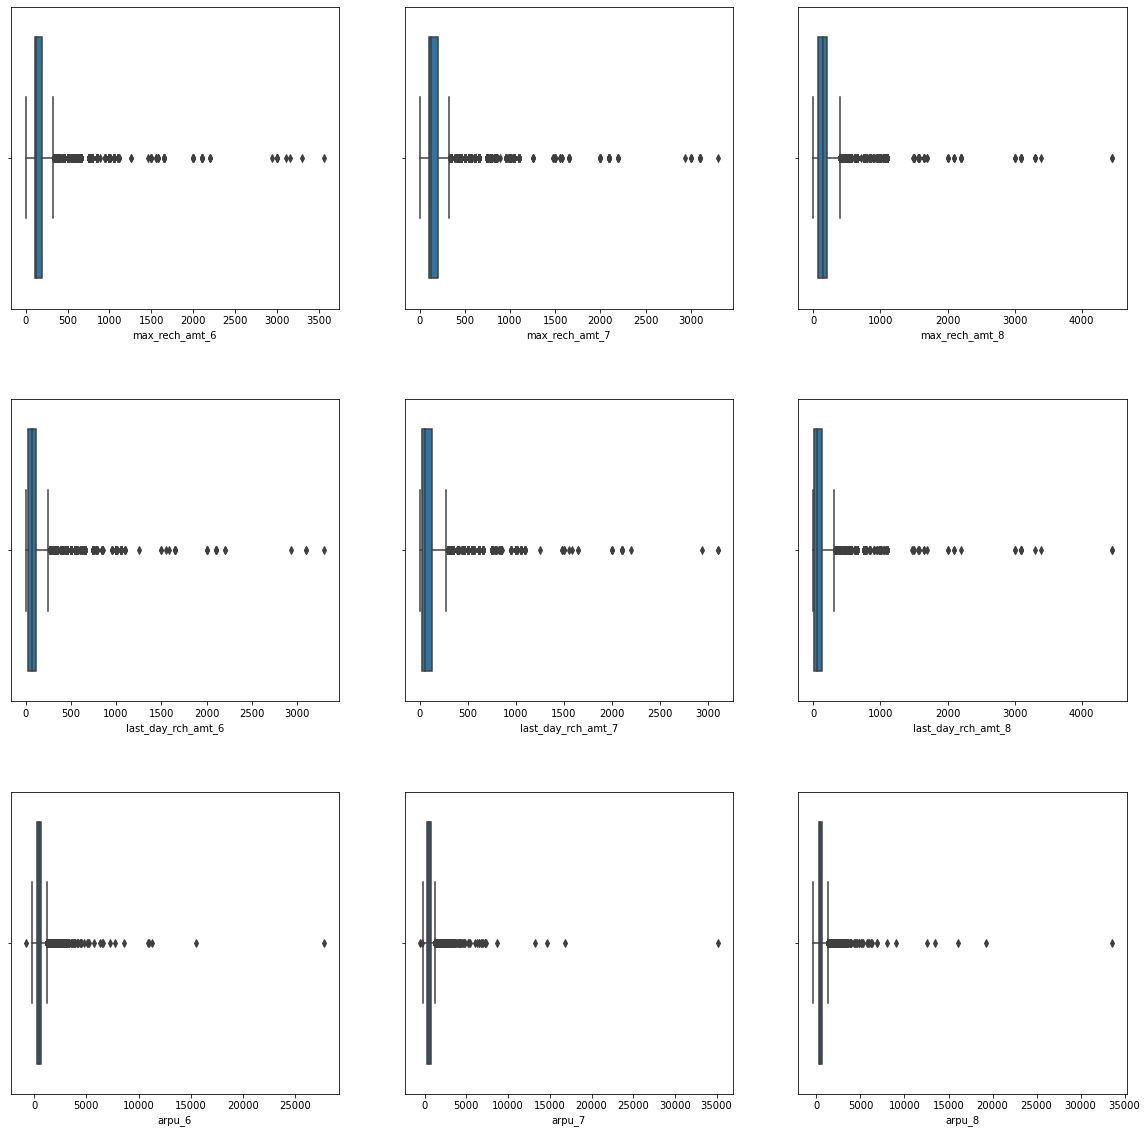

In [78]:
cols_boxplot = ["max_rech_amt_6","max_rech_amt_7","max_rech_amt_8","last_day_rch_amt_6","last_day_rch_amt_7","last_day_rch_amt_8","arpu_6","arpu_7","arpu_8"]

# Plot boxplots for each variable
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for index, col in enumerate(cols_boxplot):
    i, j = divmod(index, 3)
    sns.boxplot(df[col], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.3) 
plt.show()

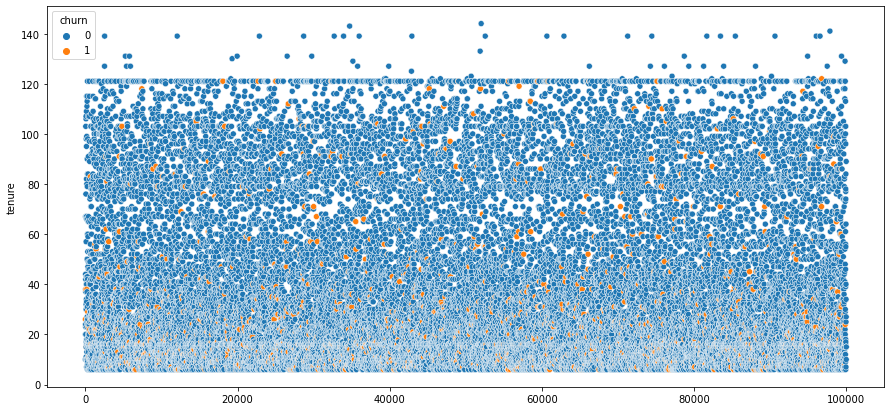

In [79]:
# plotting churn customers based on tenure

plt.figure(figsize=(15,7))
sns.scatterplot(y=df["tenure"], x=df.index, hue=df.churn)
plt.show()


<AxesSubplot:xlabel='offnet_mou_6', ylabel='arpu_6'>

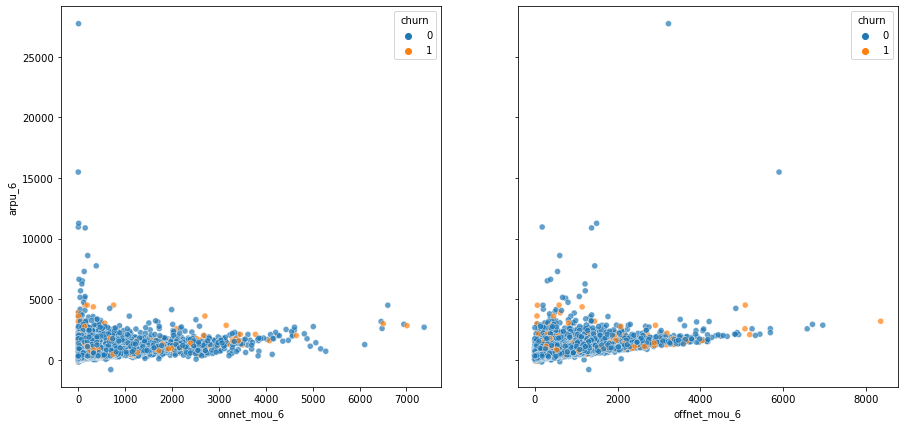

In [80]:
## plots having arpu_6 vs onnet_mou_6 and arpu_6 vs offnet_mou_6
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='arpu_6', x='onnet_mou_6', data=df, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_6', x='offnet_mou_6', data=df, ax=axes[1], hue='churn', alpha=0.7)

<AxesSubplot:xlabel='offnet_mou_7', ylabel='arpu_7'>

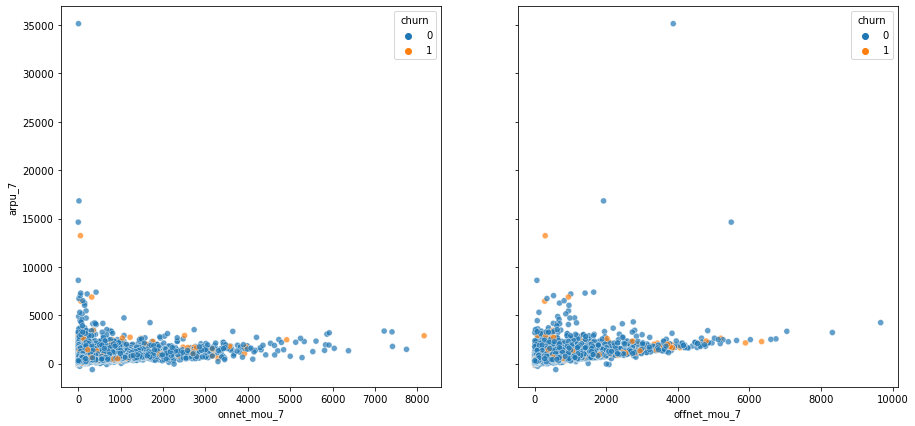

In [81]:
## plots having arpu_7 vs onnet_mou_7 and arpu_7 vs offnet_mou_7
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='arpu_7', x='onnet_mou_7', data=df, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_7', x='offnet_mou_7', data=df, ax=axes[1], hue='churn', alpha=0.7)

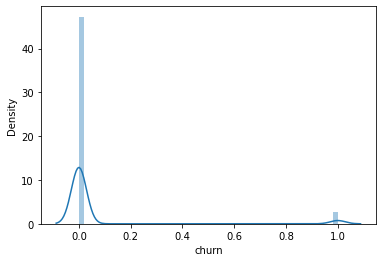

In [82]:
# Distribution of target variable

sns.distplot(df['churn'])
plt.show()

In [83]:
df.shape

(28163, 94)

In [84]:
## Dropping redundant Columns
df.drop(["aug_vbc_3g","jul_vbc_3g","jun_vbc_3g","sep_vbc_3g"],axis=1,inplace=True)
df.shape

(28163, 90)

In [85]:
df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,...,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,churn,tenure
count,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,...,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000
mean,561.489279,572.836869,528.992500,265.671912,276.742606,379.511912,390.261793,351.089623,16.352159,12.912045,...,1.239996,1.100771,0.206122,0.221425,0.209459,0.206264,0.228136,0.208287,0.054611,40.630650
std,449.110299,479.722691,500.479643,458.807410,482.945814,477.187560,501.053439,482.498518,75.823777,76.601091,...,2.760772,2.573361,0.600773,0.654647,0.619138,0.980327,1.077780,1.116503,0.227223,32.084312
min,-810.661000,-622.509000,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,318.985000,324.922000,258.075500,20.280000,19.780000,81.050000,81.100000,62.040000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,486.084000,490.526000,445.338000,90.440000,90.540000,232.110000,232.810000,202.140000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
75%,699.251500,705.983500,675.208500,299.950000,306.945000,494.450000,507.720000,459.160000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
max,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,8362.360000,9667.130000,14007.340000,2613.310000,3813.290000,...,48.000000,44.000000,14.000000,16.000000,16.000000,29.000000,33.000000,41.000000,1.000000,144.000000


## Outliers Treatment

In [86]:
# Now treating the outliers

df.arpu_6.quantile([1,.25,.5,.75,.8,.9,.95,.99,.995,.999,1])


1.000    27731.08800
0.250      318.98500
0.500      486.08400
0.750      699.25150
0.800      767.16600
0.900      989.38880
0.950     1233.31690
0.990     1956.68486
0.995     2396.22704
0.999     3774.48422
1.000    27731.08800
Name: arpu_6, dtype: float64

- So Here We Can See that the arpu_6 has distribution regular untill .99 qauntile so we can cap the data untill that and remove all the outlier data above that.

In [87]:
df=df[~(df["arpu_6"]>df["arpu_6"].quantile(0.999))]

In [88]:
df.shape

(28134, 90)

In [89]:
df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,...,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,churn,tenure
count,28134.000000,28134.000000,28134.000000,28134.000000,28134.000000,28134.000000,28134.000000,28134.000000,28134.000000,28134.000000,...,28134.000000,28134.000000,28134.000000,28134.000000,28134.000000,28134.000000,28134.000000,28134.000000,28134.000000,28134.000000
mean,554.968971,567.134114,522.872248,265.502527,276.585108,378.591255,389.511955,350.449701,16.262593,12.751484,...,1.241274,1.101585,0.205730,0.221440,0.209462,0.206405,0.228371,0.208467,0.054489,40.640826
std,369.634101,392.348711,406.029685,457.319009,481.343656,474.147009,498.954709,480.554062,75.260982,74.801150,...,2.761907,2.574312,0.597368,0.654312,0.619206,0.980752,1.078310,1.117049,0.226985,32.085673
min,-810.661000,-622.509000,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,318.672500,324.751000,257.984750,20.280000,19.780000,81.010000,80.927500,62.032500,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,485.628500,490.274000,445.006500,90.435000,90.570000,231.715000,232.650000,202.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
75%,698.481750,705.289250,674.318750,300.020000,306.962500,493.755000,506.577500,458.742500,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
max,3698.905000,13224.119000,6255.086000,7376.710000,8157.780000,8362.360000,9667.130000,14007.340000,2613.310000,3813.290000,...,48.000000,44.000000,14.000000,16.000000,16.000000,29.000000,33.000000,41.000000,1.000000,144.000000


In [90]:
df.arpu_7.quantile([1,.25,.5,.75,.8,.9,.95,.99,.995,.999,1])

1.000    13224.119000
0.250      324.751000
0.500      490.274000
0.750      705.289250
0.800      775.759600
0.900     1000.264800
0.950     1261.013300
0.990     1960.267350
0.995     2308.351675
0.999     3275.910409
1.000    13224.119000
Name: arpu_7, dtype: float64

In [91]:
df=df[~(df["arpu_7"]>df["arpu_7"].quantile(0.999))]

In [92]:
df.shape

(28105, 90)

In [93]:
df.arpu_8.quantile([1,.25,.5,.75,.8,.9,.95,.99,.995,.999,1])

1.000    6255.086000
0.250     257.790000
0.500     444.784000
0.750     673.061000
0.800     747.594000
0.900     986.982600
0.950    1254.595600
0.990    1926.947600
0.995    2234.955480
0.999    3152.740032
1.000    6255.086000
Name: arpu_8, dtype: float64

In [94]:
df=df[~(df["arpu_8"]>df["arpu_8"].quantile(0.999))]

In [95]:
df.shape

(28076, 90)

In [96]:
df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,...,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,churn,tenure
count,28076.000000,28076.000000,28076.000000,28076.000000,28076.000000,28076.000000,28076.000000,28076.000000,28076.000000,28076.000000,...,28076.000000,28076.000000,28076.000000,28076.000000,28076.000000,28076.000000,28076.000000,28076.000000,28076.000000,28076.000000
mean,552.321703,561.700330,517.109718,265.097476,275.727288,377.420937,387.906382,348.055315,16.190992,12.659669,...,1.243482,1.103362,0.203982,0.217873,0.206226,0.206760,0.228594,0.207259,0.054352,40.644109
std,363.084167,363.735393,382.400420,456.024885,477.516194,469.800538,492.803476,461.421105,75.090907,74.550974,...,2.764239,2.576502,0.591925,0.630941,0.599137,0.981698,1.079080,1.094778,0.226716,32.092114
min,-810.661000,-622.509000,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,318.330750,324.429750,257.658250,20.237500,19.705000,80.830000,80.790000,61.880000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,485.010500,489.657000,444.494500,90.395000,90.410000,231.190000,232.240000,201.570000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
75%,696.620500,703.604500,671.717250,299.795000,305.795000,492.917500,505.800000,457.660000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
max,3616.169000,3262.882000,3150.104000,7376.710000,8157.780000,8362.360000,8316.360000,7102.360000,2613.310000,3813.290000,...,48.000000,44.000000,14.000000,12.000000,10.000000,29.000000,33.000000,41.000000,1.000000,144.000000


In [97]:
cols=["onnet_mou_6","onnet_mou_7","offnet_mou_6","offnet_mou_7","offnet_mou_8"]
for i in cols:
    df=df[~(df[i]>df[i].quantile(0.999))]    

In [98]:
df.shape

(27933, 90)

In [99]:
df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,...,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,churn,tenure
count,27933.000000,27933.000000,27933.000000,27933.000000,27933.000000,27933.000000,27933.000000,27933.000000,27933.000000,27933.000000,...,27933.000000,27933.000000,27933.000000,27933.000000,27933.000000,27933.000000,27933.000000,27933.000000,27933.000000,27933.000000
mean,547.876669,556.248950,512.595749,258.219977,267.712229,369.490232,377.895407,339.021892,16.198089,12.644387,...,1.246339,1.105359,0.204704,0.218630,0.207139,0.207067,0.227652,0.207461,0.054094,40.710951
std,354.666450,353.725062,374.483348,421.569670,437.324173,438.287318,450.726876,421.763652,75.126500,74.617098,...,2.767275,2.578378,0.592977,0.632088,0.600357,0.982197,1.061569,1.095484,0.226207,32.122179
min,-810.661000,-622.509000,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,317.682000,323.593000,257.200000,20.160000,19.540000,80.430000,80.380000,61.610000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,483.605000,488.073000,443.219000,89.980000,89.860000,229.640000,231.180000,200.310000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
75%,693.205000,699.296000,668.505000,297.340000,303.360000,490.040000,501.740000,454.590000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
max,3616.169000,3262.882000,3107.914000,4036.490000,3815.040000,3920.910000,3953.890000,3665.410000,2613.310000,3813.290000,...,48.000000,44.000000,14.000000,12.000000,10.000000,29.000000,31.000000,41.000000,1.000000,144.000000


In [100]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27933 entries, 8 to 99997
Data columns (total 90 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   arpu_6              27933 non-null  float64 
 1   arpu_7              27933 non-null  float64 
 2   arpu_8              27933 non-null  float64 
 3   onnet_mou_6         27933 non-null  float64 
 4   onnet_mou_7         27933 non-null  float64 
 5   offnet_mou_6        27933 non-null  float64 
 6   offnet_mou_7        27933 non-null  float64 
 7   offnet_mou_8        27933 non-null  float64 
 8   roam_ic_mou_6       27933 non-null  float64 
 9   roam_ic_mou_7       27933 non-null  float64 
 10  roam_ic_mou_8       27933 non-null  float64 
 11  roam_og_mou_6       27933 non-null  float64 
 12  roam_og_mou_7       27933 non-null  float64 
 13  roam_og_mou_8       27933 non-null  float64 
 14  loc_og_t2t_mou_6    27933 non-null  float64 
 15  loc_og_t2m_mou_6    27933 non-null  

In [101]:
df.total_rech_num_6.quantile([0,.25,.5,.75,.8,.9,.95,.99,.995,.999,1])

0.000      1.0
0.250      6.0
0.500     10.0
0.750     15.0
0.800     16.0
0.900     22.0
0.950     29.0
0.990     47.0
0.995     54.0
0.999     76.0
1.000    170.0
Name: total_rech_num_6, dtype: float64

In [102]:
df.total_rech_num_7.quantile([0,.25,.5,.75,.8,.9,.95,.99,.995,.999,1])

0.000      1.0
0.250      6.0
0.500      9.0
0.750     15.0
0.800     17.0
0.900     23.0
0.950     29.0
0.990     48.0
0.995     57.0
0.999     80.0
1.000    120.0
Name: total_rech_num_7, dtype: float64

In [103]:
df.total_rech_num_8.quantile([0,.25,.5,.75,.8,.9,.95,.99,.995,.999,1])

0.000      1.000
0.250      4.000
0.500      8.000
0.750     13.000
0.800     15.000
0.900     21.000
0.950     28.000
0.990     45.000
0.995     53.000
0.999     72.068
1.000    196.000
Name: total_rech_num_8, dtype: float64

In [104]:
df.max_rech_amt_6.quantile([0,.25,.5,.75,.8,.9,.95,.99,.995,.999,1])

0.000       0.000
0.250     110.000
0.500     120.000
0.750     198.000
0.800     250.000
0.900     252.000
0.950     440.000
0.990    1000.000
0.995    1000.000
0.999    1584.692
1.000    3559.000
Name: max_rech_amt_6, dtype: float64

In [105]:
df.max_rech_amt_7.quantile([0,.25,.5,.75,.8,.9,.95,.99,.995,.999,1])

0.000       0.0
0.250     110.0
0.500     128.0
0.750     200.0
0.800     250.0
0.900     252.0
0.950     455.0
0.990    1000.0
0.995    1000.0
0.999    1649.0
1.000    3299.0
Name: max_rech_amt_7, dtype: float64

In [106]:
df.max_rech_amt_8.quantile([0,.25,.5,.75,.8,.9,.95,.99,.995,.999,1])

0.000       0.0
0.250      67.0
0.500     130.0
0.750     198.0
0.800     229.0
0.900     252.0
0.950     400.0
0.990     849.0
0.995    1000.0
0.999    1500.0
1.000    4449.0
Name: max_rech_amt_8, dtype: float64

In [107]:
df.last_day_rch_amt_6.quantile([0,.25,.5,.75,.8,.9,.95,.99,.995,.999,1])

0.000       0.0
0.250      25.0
0.500      67.0
0.750     120.0
0.800     128.0
0.900     202.0
0.950     252.0
0.990     550.0
0.995     849.0
0.999    1050.0
1.000    3299.0
Name: last_day_rch_amt_6, dtype: float64

In [108]:
df.last_day_rch_amt_7.quantile([0,.25,.5,.75,.8,.9,.95,.99,.995,.999,1])

0.000       0.0
0.250      24.0
0.500      56.0
0.750     130.0
0.800     146.2
0.900     229.0
0.950     252.0
0.990     550.0
0.995     849.0
0.999    1098.0
1.000    2199.0
Name: last_day_rch_amt_7, dtype: float64

In [109]:
df.last_day_rch_amt_8.quantile([0,.25,.5,.75,.8,.9,.95,.99,.995,.999,1])

0.000       0.0
0.250      10.0
0.500      50.0
0.750     130.0
0.800     145.0
0.900     220.0
0.950     252.0
0.990     550.0
0.995     790.0
0.999    1098.0
1.000    4449.0
Name: last_day_rch_amt_8, dtype: float64

In [110]:
df=df[~(df["total_rech_num_6"]>df["total_rech_num_6"].quantile(0.999))]
df=df[~(df["total_rech_num_7"]>df["total_rech_num_7"].quantile(0.999))]
df=df[~(df["total_rech_num_8"]>df["total_rech_num_8"].quantile(0.999))]
df=df[~(df["max_rech_amt_6"]>df["max_rech_amt_6"].quantile(0.999))]
df=df[~(df["max_rech_amt_7"]>df["max_rech_amt_7"].quantile(0.999))]
df=df[~(df["max_rech_amt_8"]>df["max_rech_amt_8"].quantile(0.999))]
df=df[~(df["last_day_rch_amt_6"]>df["last_day_rch_amt_6"].quantile(0.999))]
df=df[~(df["last_day_rch_amt_7"]>df["last_day_rch_amt_7"].quantile(0.999))]
df=df[~(df["last_day_rch_amt_8"]>df["last_day_rch_amt_8"].quantile(0.999))]

In [111]:
df.shape

(27699, 90)

In [112]:
df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,...,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,churn,tenure
count,27699.000000,27699.000000,27699.000000,27699.000000,27699.000000,27699.000000,27699.000000,27699.000000,27699.000000,27699.000000,...,27699.000000,27699.000000,27699.000000,27699.000000,27699.000000,27699.000000,27699.000000,27699.000000,27699.000000,27699.000000
mean,544.672453,551.279728,508.316463,257.015356,266.359151,367.960614,375.400149,337.163611,16.131687,12.609111,...,1.250731,1.106935,0.204520,0.218203,0.207192,0.206397,0.225387,0.205386,0.053612,40.656811
std,349.851127,346.533440,368.264573,419.377586,435.285860,436.209072,447.187467,419.400383,75.054970,74.700070,...,2.763473,2.568192,0.593317,0.632227,0.601342,0.967876,1.025910,1.062264,0.225255,32.091743
min,-810.661000,-622.509000,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,316.987000,322.475500,256.327500,20.050000,19.460000,80.035000,79.960000,61.270000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,482.583000,486.009000,441.157000,89.640000,89.290000,228.780000,229.810000,199.430000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
75%,688.876500,694.846000,664.315500,295.995000,302.060000,488.215000,498.815000,451.720000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
max,3606.703000,3262.882000,3088.266000,4036.490000,3815.040000,3911.230000,3953.890000,3665.410000,2613.310000,3813.290000,...,48.000000,44.000000,14.000000,12.000000,10.000000,29.000000,24.000000,41.000000,1.000000,144.000000


In [113]:
#creating dummy Variables for tenure_range

dummy = pd.get_dummies(df['tenure_range'], drop_first=True)
dummy.head()

,6-12 Months,1-2 Yrs,2-5 Yrs,5 Yrs and above
8,1,0,0,0
21,0,1,0,0
23,0,1,0,0
33,0,0,1,0
38,0,0,1,0


In [114]:
# adding dummies to df
df = pd.concat([df, dummy], axis=1)
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,churn,tenure,tenure_range,6-12 Months,1-2 Yrs,2-5 Yrs,5 Yrs and above
8,378.721,492.223,137.362,413.69,351.03,94.66,80.63,136.48,0.0,0.0,...,0,0,0,0,10,6-12 Months,1,0,0,0
21,514.453,597.753,637.760,102.41,132.11,757.93,896.68,983.39,0.0,0.0,...,0,0,0,0,24,1-2 Yrs,0,1,0,0
23,74.350,193.897,366.966,48.96,50.66,85.41,89.36,205.89,0.0,0.0,...,0,0,1,0,20,1-2 Yrs,0,1,0,0
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,1,3,0,0,44,2-5 Yrs,0,0,1,0
38,363.987,486.558,393.909,248.99,619.96,88.86,50.58,97.81,0.0,0.0,...,0,0,0,0,38,2-5 Yrs,0,0,1,0


In [115]:
df.drop("tenure_range",axis=1,inplace=True)

## Data Preparation

In [116]:
X = df.drop('churn', axis=1)
y = df['churn']

In [117]:
X.shape

(27699, 92)

In [118]:
y.shape

(27699,)

#### Standardization

In [119]:
num_col = X.select_dtypes(include = ['int64','float64']).columns.tolist()

In [120]:
num_col

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[num_col] = scaler.fit_transform(X[num_col])

In [122]:
X

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,tenure,6-12 Months,1-2 Yrs,2-5 Yrs,5 Yrs and above
8,-0.474357,-0.170425,-1.007322,0.373595,0.194521,-0.626547,-0.659177,-0.478510,-0.214936,-0.1688,...,-0.345140,-0.344555,-0.213252,-0.219699,-0.193351,-0.955304,1,0,0,0
21,-0.086380,0.134111,0.351502,-0.368661,-0.308422,0.894013,1.165706,1.540862,-0.214936,-0.1688,...,-0.345140,-0.344555,-0.213252,-0.219699,-0.193351,-0.519047,0,1,0,0
23,-1.344375,-1.031327,-0.383835,-0.496114,-0.495543,-0.647753,-0.639654,-0.313009,-0.214936,-0.1688,...,2.818340,1.318423,-0.213252,-0.219699,0.748051,-0.643692,0,1,0,0
33,1.235827,5.227738,-0.269068,-0.612861,-0.611929,-0.843557,-0.839484,-0.803933,-0.214936,-0.1688,...,7.563559,1.318423,0.819958,2.704587,-0.193351,0.104178,0,0,1,0
38,-0.516473,-0.186772,-0.310672,-0.019137,0.812356,-0.639844,-0.726375,-0.570715,-0.214936,-0.1688,...,-0.345140,-0.344555,-0.213252,-0.219699,-0.193351,-0.082789,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,-0.458365,-0.853828,-0.311853,-0.425246,-0.545213,-0.714878,-0.776668,-0.657435,-0.214936,-0.1688,...,1.236600,1.318423,-0.213252,-0.219699,-0.193351,-0.799498,0,1,0,0
99984,-0.617641,-1.005156,-1.057980,0.398156,-0.194196,-0.752980,-0.750460,-0.760394,-0.214936,-0.1688,...,-0.345140,-0.344555,-0.213252,-0.219699,-0.193351,-0.425563,0,0,1,0
99986,0.286700,-0.277184,0.152115,1.310811,0.650161,0.955521,0.540566,0.615834,-0.214936,-0.1688,...,-0.345140,-0.344555,-0.213252,-0.219699,-0.193351,1.506433,0,0,0,1
99988,-0.663478,-0.110663,-0.288484,-0.136217,-0.211127,-0.440349,-0.220024,-0.211815,-0.214936,-0.1688,...,-0.345140,-0.344555,-0.213252,-0.219699,-0.193351,-0.955304,1,0,0,0


### Handling the Data Imbalance

In [123]:
df.churn.value_counts()

0    26214
1     1485
Name: churn, dtype: int64

In [124]:
# SMOTE to take care of  imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [125]:
y_res.value_counts()

0    26214
1    26214
Name: churn, dtype: int64

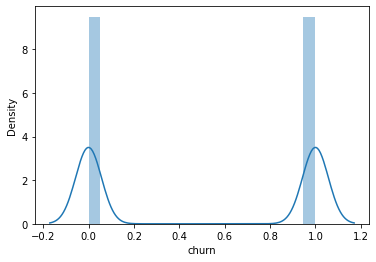

In [126]:
sns.distplot(y_res)
plt.show()

- Hence the skewness of the Target Variable is Removed

# PCA

In [127]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_res)
X_pca.shape

(52428, 30)

## Train Test Split of the Data

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.75, test_size=0.25, random_state=100)

In [129]:
print(X_train.shape)
print(X_test.shape)

(39321, 92)
(13107, 92)


In [130]:
print(y_train.shape)
print(y_test.shape)

(39321,)
(13107,)


In [131]:
X_train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,tenure,6-12 Months,1-2 Yrs,2-5 Yrs,5 Yrs and above
20398,0.462452,-0.232734,0.175436,-0.075078,-0.319036,0.431520,-0.092558,0.190791,-0.214936,-0.168800,...,-0.34514,-0.344555,-0.213252,-0.219699,-0.193351,-0.612530,0,1,0,0
6292,-0.065993,-0.646725,0.175607,-0.600366,-0.596858,0.324619,0.191601,0.527349,-0.214936,-0.168800,...,1.23660,2.981401,-0.213252,-0.219699,-0.193351,-0.394402,0,0,1,0
47487,-0.384592,-0.396847,-0.797918,1.195810,0.577433,-0.476533,-0.406496,-0.516435,-0.214936,-0.168800,...,-0.34514,-0.344555,1.750547,0.658249,-0.193351,-0.939829,0,0,0,0
24846,-0.505791,-0.331410,-0.309377,-0.438003,-0.407783,-0.052959,0.017241,0.477539,-0.214936,0.039905,...,-0.34514,-0.344555,-0.213252,-0.219699,-0.193351,-0.456724,0,0,1,0
1146,0.721619,-0.840104,-0.018374,2.371044,0.116939,0.011920,-0.613982,-0.050749,-0.214936,-0.168800,...,-0.34514,-0.344555,-0.213252,-0.219699,-0.193351,-0.612530,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,-0.811724,0.192846,-0.368452,-0.471482,-0.467240,-0.696469,-0.139922,-0.467756,-0.126599,-0.168800,...,-0.34514,-0.344555,-0.213252,-0.219699,-0.193351,-0.799498,0,1,0,0
79,-0.550463,-0.886969,-0.555883,-0.572777,-0.609884,-0.669761,-0.788409,-0.797853,-0.214936,-0.168800,...,-0.34514,-0.344555,-0.213252,-0.219699,-0.193351,-0.487885,0,0,1,0
12119,-0.742636,-1.039765,-0.924481,-0.611668,-0.609976,-0.762196,-0.787738,-0.803933,-0.197215,-0.168800,...,-0.34514,-0.344555,-0.213252,-0.219699,-0.193351,-0.924143,1,0,0,0
14147,-1.155662,-1.316808,-1.314422,-0.514666,-0.560376,-0.741632,-0.768730,-0.764614,-0.214936,-0.168800,...,-0.34514,-0.344555,0.819958,-0.219699,-0.193351,-0.207434,0,0,1,0


## **Model Building**

## 1.Logistic Regression

In [132]:
## Running Your First Training Model
import statsmodels.api as sm

In [133]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39321
Model:                            GLM   Df Residuals:                    39228
Model Family:                Binomial   Df Model:                           92
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12920.
Date:                Mon, 02 May 2022   Deviance:                       25840.
Time:                        16:50:35   Pearson chi2:                 1.17e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.9488      0.064     30.256      0.000       1.823       2.075
arpu_6                 0.1323      0.048      2.745      0.006       0.038       0.227
arpu_7                 0.3364      0.047      7.114      0.000       0.244       0.429
arpu_8                -0.3892      0.054     -7.208      0.000      -0.495      -0.283
onnet_mou_6           -1.2377      2.035     -0.608      0.543      -5.227       2.751
onnet_mou_7           -0.3161      0.075     -4.238      0.000      -0.462      -0.170
offnet_mou_6          -1.3516      2.117     -0.638      0.523      -5.501       2.798
offnet_mou_7          -0.0367      0.092     -0.399      0.690      -0.217       0.144
offnet_mou_8          -0.4307      0.046     -9.292      0.000      -0.522      -0.340
roam_ic_mou_6         -0.0120      0.025     -0.481      0.630      -0.061       0.037
roam_ic_mou_7          0.0433      0.028      1.548      0.122      -0.012       0.098
roam_ic_mou_8          0.0285      0.019      1.462      0.144      -0.010       0.067
roam_og_mou_6          0.2903      0.559      0.519      0.604      -0.805       1.386
roam_og_mou_7          0.0805      0.031      2.630      0.009       0.021       0.140
roam_og_mou_8          0.2600      0.024     10.888      0.000       0.213       0.307
loc_og_t2t_mou_6    2511.8038    612.395      4.102      0.000    1311.532    3712.075
loc_og_t2m_mou_6    2915.3943    710.817      4.101      0.000    1522.218    4308.571
loc_og_t2m_mou_7      -0.0652      0.063     -1.041      0.298      -0.188       0.058
loc_og_t2f_mou_6     259.9267     63.373      4.102      0.000     135.718     384.135
loc_og_t2f_mou_8      -0.1482      0.044     -3.333      0.001      -0.235      -0.061
loc_og_t2c_mou_6      -0.1730      0.027     -6.477      0.000      -0.225      -0.121
loc_og_t2c_mou_7      -0.0914      0.032     -2.846      0.004      -0.154      -0.028
loc_og_t2c_mou_8       0.1847      0.033      5.589      0.000       0.120       0.249
loc_og_mou_6       -4301.3725   1048.971     -4.101      0.000   -6357.318   -2245.427
std_og_t2f_mou_6      -0.0662      0.038     -1.724      0.085      -0.142       0.009
std_og_t2f_mou_7       0.0187      0.042      0.442      0.658      -0.064       0.102
std_og_t2f_mou_8      -0.0825      0.051     -1.618      0.106      -0.182       0.017
std_og_mou_6           1.8378      2.692      0.683      0.495      -3.439       7.114
std_og_mou_7           0.4510      0.107      4.218      0.000       0.241       0.661
std_og_mou_8          -0.1691      0.047     -3.567      0.000      -0.262      -0.076
isd_og_mou_6           0.0501      0.072      0.700      0.484      -0.090       0.190
spl_og_mou_6           0.0918      0.075      1.222      0.222      -0.055       0.239
spl_og_mou_7           0.0137      0.0

In [134]:
## RFE For Feature Elimination

In [135]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [136]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select= 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [137]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 36),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 46),
 ('onnet_mou_7', True, 1),
 ('offnet_mou_6', False, 73),
 ('offnet_mou_7', False, 51),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 68),
 ('roam_ic_mou_7', False, 42),
 ('roam_ic_mou_8', False, 54),
 ('roam_og_mou_6', False, 39),
 ('roam_og_mou_7', False, 33),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 65),
 ('loc_og_t2m_mou_6', False, 38),
 ('loc_og_t2m_mou_7', False, 12),
 ('loc_og_t2f_mou_6', False, 72),
 ('loc_og_t2f_mou_8', False, 13),
 ('loc_og_t2c_mou_6', False, 16),
 ('loc_og_t2c_mou_7', False, 29),
 ('loc_og_t2c_mou_8', False, 22),
 ('loc_og_mou_6', False, 55),
 ('std_og_t2f_mou_6', False, 49),
 ('std_og_t2f_mou_7', False, 59),
 ('std_og_t2f_mou_8', False, 26),
 ('std_og_mou_6', False, 2),
 ('std_og_mou_7', True, 1),
 ('std_og_mou_8', False, 18),
 ('isd_og_mou_6', False, 69),
 ('spl_og_mou_6', False, 47),
 ('spl_og_mou_7', False, 64),
 ('spl_og_mou_8', False

In [138]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['arpu_7', 'arpu_8', 'onnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8',
       'std_og_mou_7', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'tenure', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above'],
      dtype='object')

In [139]:
# Building model with RFE selected columns
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39321
Model:                            GLM   Df Residuals:                    39300
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13486.
Date:                Mon, 02 May 2022   Deviance:                       26972.
Time:                        16:50:50   Pearson chi2:                 1.05e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.0417      0.063     32.520      0.000       1.919       2.165
arpu_7                 0.4392      0.027     16.503      0.000       0.387       0.491
arpu_8                -0.6339      0.040    -16.029      0.000      -0.711      -0.556
onnet_mou_7           -0.3366      0.027    -12.334      0.000      -0.390      -0.283
offnet_mou_8          -0.6326      0.035    -18.116      0.000      -0.701      -0.564
roam_og_mou_8          0.4375      0.016     27.506      0.000       0.406       0.469
std_og_mou_7           0.6457      0.030     21.599      0.000       0.587       0.704
loc_ic_t2f_mou_8      -0.6730      0.048    -14.069      0.000      -0.767      -0.579
std_ic_t2t_mou_8      -0.3369      0.041     -8.249      0.000      -0.417      -0.257
std_ic_t2f_mou_8      -0.4285      0.074     -5.810      0.000      -0.573      -0.284
spl_ic_mou_8          -0.6561      0.035    -18.779      0.000      -0.725      -0.588
total_rech_num_8      -0.4758      0.027    -17.524      0.000      -0.529      -0.423
last_day_rch_amt_8    -0.6229      0.024    -25.829      0.000      -0.670      -0.576
monthly_2g_8          -0.8062      0.031    -25.789      0.000      -0.867      -0.745
sachet_2g_8           -0.7372      0.030    -24.376      0.000      -0.796      -0.678
monthly_3g_8          -0.7530      0.037    -20.391      0.000      -0.825      -0.681
tenure                 0.7132      0.052     13.666      0.000       0.611       0.815
6-12 Months           -3.3500      0.070    -47.786      0.000      -3.487      -3.213
1-2 Yrs               -3.5450      0.064    -55.098      0.000      -3.671      -3.419
2-5 Yrs               -4.1270      0.070    -58.708      0.000      -4.265      -3.989
5 Yrs and above       -5.7356      0.135    -42.438      0.000      -6.001      -5.471
======================================================================================
"""

In [140]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.056720,0
1,0,0.052557,0
2,1,0.963138,1
3,0,0.067069,0
4,0,0.157180,0


In [141]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print("Confusion Matrix:\n",confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

Confusion Matrix:
 [[17089  2625]
 [ 2800 16807]]

Accuracy : 0.8620330103507032


In [142]:
# Checking VIF for Features selected 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,arpu_8,4.91
15,tenure,4.25
19,5 Yrs and above,2.90
5,std_og_mou_7,2.89
3,offnet_mou_8,2.79
2,onnet_mou_7,2.25
0,arpu_7,2.22
10,total_rech_num_8,2.00
16,6-12 Months,1.60
17,1-2 Yrs,1.53


In [143]:
# WE Need To drop arpu_8 since it has got the highest VIF

In [144]:
rfe_col = rfe_col.drop('arpu_8', 1)

In [145]:
# Building new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39321
Model:                            GLM   Df Residuals:                    39301
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13621.
Date:                Mon, 02 May 2022   Deviance:                       27241.
Time:                        16:50:50   Pearson chi2:                 1.08e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.0651      0.063     32.881      0.000       1.942       2.188
arpu_7                 0.2776      0.024     11.591      0.000       0.231       0.325
onnet_mou_7           -0.4945      0.026    -19.313      0.000      -0.545      -0.444
offnet_mou_8          -0.9346      0.030    -31.020      0.000      -0.994      -0.876
roam_og_mou_8          0.3762      0.015     24.980      0.000       0.347       0.406
std_og_mou_7           0.7756      0.029     26.746      0.000       0.719       0.832
loc_ic_t2f_mou_8      -0.7406      0.049    -15.141      0.000      -0.836      -0.645
std_ic_t2t_mou_8      -0.4018      0.041     -9.704      0.000      -0.483      -0.321
std_ic_t2f_mou_8      -0.5223      0.076     -6.917      0.000      -0.670      -0.374
spl_ic_mou_8          -0.6684      0.035    -18.885      0.000      -0.738      -0.599
total_rech_num_8      -0.6680      0.025    -26.812      0.000      -0.717      -0.619
last_day_rch_amt_8    -0.7432      0.023    -32.558      0.000      -0.788      -0.698
monthly_2g_8          -0.8768      0.031    -28.205      0.000      -0.938      -0.816
sachet_2g_8           -0.7323      0.030    -24.185      0.000      -0.792      -0.673
monthly_3g_8          -0.8930      0.036    -24.625      0.000      -0.964      -0.822
tenure                 0.6936      0.052     13.372      0.000       0.592       0.795
6-12 Months           -3.3899      0.070    -48.186      0.000      -3.528      -3.252
1-2 Yrs               -3.5757      0.065    -55.307      0.000      -3.702      -3.449
2-5 Yrs               -4.1494      0.070    -59.005      0.000      -4.287      -4.012
5 Yrs and above       -5.7909      0.134    -43.096      0.000      -6.054      -5.528
======================================================================================
"""

In [146]:
# Predictions on training data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.032388,0
1,0,0.047027,0
2,1,0.959015,1
3,0,0.060082,0
4,0,0.160645,0


In [147]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print("Confusion Matrix:\n",confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

Confusion Matrix:
 [[16932  2782]
 [ 2774 16833]]

Accuracy : 0.8587014572365911


In [148]:
# Checking VIF for Features selected 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,tenure,4.23
18,5 Yrs and above,2.90
4,std_og_mou_7,2.61
1,onnet_mou_7,2.04
2,offnet_mou_8,1.90
0,arpu_7,1.85
9,total_rech_num_8,1.61
15,6-12 Months,1.60
16,1-2 Yrs,1.53
10,last_day_rch_amt_8,1.34


In [149]:
# WE Need To drop tenure since it has got the highest VIF

In [150]:
rfe_col = rfe_col.drop('tenure', 1)

In [151]:
# Building new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39321
Model:                            GLM   Df Residuals:                    39302
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13714.
Date:                Mon, 02 May 2022   Deviance:                       27428.
Time:                        16:50:51   Pearson chi2:                 9.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.6940      0.054     31.285      0.000       1.588       1.800
arpu_7                 0.2800      0.024     11.762      0.000       0.233       0.327
onnet_mou_7           -0.4868      0.026    -19.088      0.000      -0.537      -0.437
offnet_mou_8          -0.9153      0.030    -30.729      0.000      -0.974      -0.857
roam_og_mou_8          0.3800      0.015     25.367      0.000       0.351       0.409
std_og_mou_7           0.7582      0.029     26.290      0.000       0.702       0.815
loc_ic_t2f_mou_8      -0.7074      0.049    -14.551      0.000      -0.803      -0.612
std_ic_t2t_mou_8      -0.4023      0.041     -9.768      0.000      -0.483      -0.322
std_ic_t2f_mou_8      -0.4763      0.072     -6.656      0.000      -0.617      -0.336
spl_ic_mou_8          -0.6792      0.036    -19.113      0.000      -0.749      -0.610
total_rech_num_8      -0.6822      0.025    -27.352      0.000      -0.731      -0.633
last_day_rch_amt_8    -0.7123      0.022    -31.927      0.000      -0.756      -0.669
monthly_2g_8          -0.8735      0.031    -28.306      0.000      -0.934      -0.813
sachet_2g_8           -0.7260      0.030    -23.959      0.000      -0.785      -0.667
monthly_3g_8          -0.8879      0.036    -24.931      0.000      -0.958      -0.818
6-12 Months           -3.6592      0.068    -53.773      0.000      -3.793      -3.526
1-2 Yrs               -3.6608      0.064    -57.014      0.000      -3.787      -3.535
2-5 Yrs               -3.8020      0.063    -60.163      0.000      -3.926      -3.678
5 Yrs and above       -4.3297      0.070    -62.280      0.000      -4.466      -4.193
======================================================================================
"""

In [152]:
# Predictions on training data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.028211,0
1,0,0.058773,0
2,1,0.968116,1
3,0,0.077215,0
4,0,0.152699,0


In [153]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print("Confusion Matrix:\n",confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

Confusion Matrix:
 [[16954  2760]
 [ 2792 16815]]

Accuracy : 0.8588031840492357


In [154]:
# Checking VIF for Features selected 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,std_og_mou_7,2.58
1,onnet_mou_7,2.03
2,offnet_mou_8,1.88
0,arpu_7,1.85
9,total_rech_num_8,1.60
10,last_day_rch_amt_8,1.32
12,sachet_2g_8,1.29
13,monthly_3g_8,1.15
5,loc_ic_t2f_mou_8,1.11
3,roam_og_mou_8,1.10


- Here The VIF values Seems to be good So we Can process Further In the analysis


In [155]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [156]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8576018768807059

In [157]:
# Let us calculate specificity
TN / float(TN+FP)

0.8599979709850868

In [158]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14000202901491327


In [159]:
# positive predictive value 
print (TP / float(TP+FP))

0.8590038314176245


In [160]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8586042742833991


### Plotting ROC CURVE

- An ROC curve demonstrates several things:
    - It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
    - The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
    - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [161]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [162]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

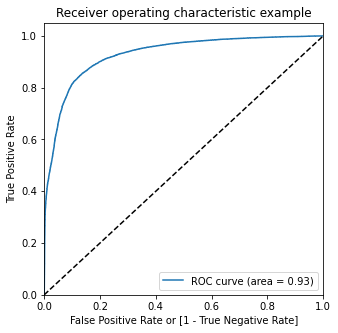

In [163]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

##### Optimal Cutoff Point

In [164]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.028211,0,1,0,0,0,0,0,0,0,0,0
1,0,0.058773,0,1,0,0,0,0,0,0,0,0,0
2,1,0.968116,1,1,1,1,1,1,1,1,1,1,1
3,0,0.077215,0,1,0,0,0,0,0,0,0,0,0
4,0,0.152699,0,1,1,0,0,0,0,0,0,0,0


In [165]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.498639  1.000000  0.000000
0.1   0.1  0.715724  0.979599  0.453282
0.2   0.2  0.784339  0.959606  0.610023
0.3   0.3  0.824343  0.934666  0.714619
0.4   0.4  0.849800  0.902076  0.797809
0.5   0.5  0.858803  0.857602  0.859998
0.6   0.6  0.853386  0.799408  0.907071
0.7   0.7  0.821190  0.699189  0.942528
0.8   0.8  0.765316  0.563727  0.965811
0.9   0.9  0.725745  0.468455  0.981637


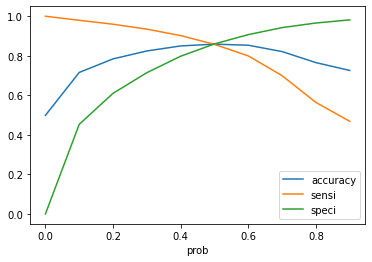

In [166]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [167]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.028211,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.058773,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.968116,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.077215,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.152699,0,1,1,0,0,0,0,0,0,0,0,0


In [168]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predictions on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
16044,0,0.012376,0
12305,0,0.260590,0
18515,0,0.072175,0
31355,1,0.989110,1
34540,1,0.841269,1


In [169]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print("Confusion Matrix:\n",confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

Confusion Matrix:
 [[5625  875]
 [ 911 5696]]

Accuracy : 0.863736934462501


In [170]:
# Top 10 predictors

abs(res.params).sort_values(ascending=False)[0:11]

5 Yrs and above       4.329714
2-5 Yrs               3.802014
1-2 Yrs               3.660825
6-12 Months           3.659165
const                 1.693950
offnet_mou_8          0.915310
monthly_3g_8          0.887882
monthly_2g_8          0.873487
std_og_mou_7          0.758184
sachet_2g_8           0.726027
last_day_rch_amt_8    0.712259
dtype: float64

## 2.Decision Tree

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size=0.75, random_state=100)

In [172]:
from sklearn.tree import DecisionTreeClassifier

# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

# Train set  Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(X_test)

# Report on the test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.884946974898909
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      6500
           1       0.81      0.89      0.85      6607

    accuracy                           0.84     13107
   macro avg       0.84      0.84      0.84     13107
weighted avg       0.84      0.84      0.84     13107



### ROC Curve

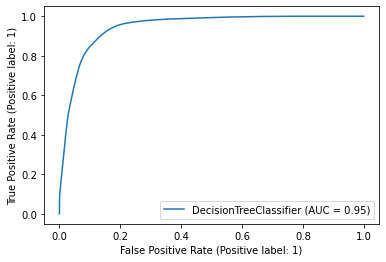

In [173]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(intial_dt, X_train, y_train, drop_intermediate=False)
plt.show()

#### Hyper Parameter Tuning 

In [174]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)


params = {
    "max_depth": [5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 1000],
    "min_samples_leaf" : [5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 35 candidates, totalling 140 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [175]:
grid_search.best_score_

0.8505379959980848

In [176]:
# Best estimator
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [177]:
y_train_pred = grid_search.best_estimator_.predict(X_train)
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      6500
           1       0.86      0.88      0.87      6607

    accuracy                           0.87     13107
   macro avg       0.87      0.87      0.87     13107
weighted avg       0.87      0.87      0.87     13107



### ROC Curve

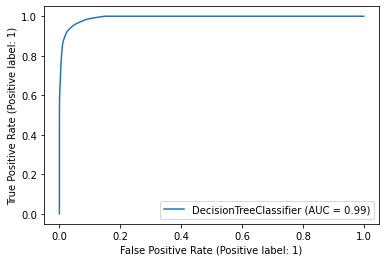

In [178]:
plot_roc_curve(grid_search.best_estimator_, X_train, y_train)
plt.show()

- ##### Hence an accuracy of 87% is seen in the test data Using Decision Tree

## 3.Random Forest

In [179]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

In [180]:
# Training set Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

Train accuracy : 0.884946974898909


In [181]:
y_test_pred = rf.predict(X_test)

In [182]:
# Report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      6500
           1       0.88      0.89      0.89      6607

    accuracy                           0.88     13107
   macro avg       0.88      0.88      0.88     13107
weighted avg       0.88      0.88      0.88     13107



#### ROC Curve

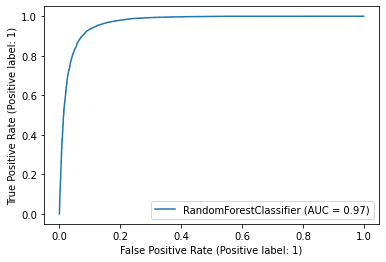

In [183]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

### Hyper Parameter Tuning

In [184]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)


params = {
    'max_depth': [3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [185]:
grid_search.best_score_

0.9294016022354598

In [186]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [187]:
y_train_pred = grid_search.best_estimator_.predict(X_train)
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      6500
           1       0.94      0.95      0.94      6607

    accuracy                           0.94     13107
   macro avg       0.94      0.94      0.94     13107
weighted avg       0.94      0.94      0.94     13107



### ROC Curve

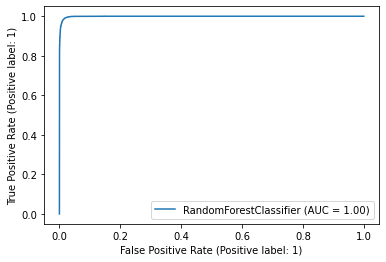

In [190]:
plot_roc_curve(grid_search.best_estimator_, X_train, y_train)
plt.show()

- ##### Hence an accuracy of 94% is seen in the test data Using Random Forest

## Conclusion:
    
    - As per the given business problem, to retain customers, we needed higher recall. As it is cost effective to retain an existing customer in comparison to bringing a new customer on board.So hence we need to have high rate of correctly identifying the true positives and recall.
    - When we compare the models trained we can see the tuned random forest is  performing the best, which is having the highest accuracy along with the highest recall i.e. 94% and 95% respectively in comparison with Logistic Regression And Decision Tree Model.Hence Random Forest is the best Classifier for our problem.

#### Factors which impacted during the EDA process of the data:
- So the customers having less than 2 years association with telecom company have more probabilities of Churning.
- ARPU was higher in the 6th month as compared to 7th month for both onnet and offnet.
- Max recharge amount for the 6th,7th and 8th month was capped at around 1000.